In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

class RamanSpectra(object):

    def __init__(self, pathFile, upLevels = 0):
        self.pathFile = pathFile
        self.readFromLocation(pathFile, upLevels)
        # After this execution the object has the following properties
        # self ... content, info, spx, spy
        return;
    
    def __str__(self):
        return 'raman_s at +++ ' + self.pathFile;

    def __repr__(self):
        return 'raman_s at ... ' + self.pathFile;
    
    def readFromLocation(self, pathFile, upLevels):
        count = 0
        initialPath = os.getcwd().split('/')[1:]
        # TODO: Raise error when upLevels > treeDepth
        while count  < upLevels:
            initialPath.pop()
            count +=1
        docLoc = '/'+ '/'.join(initialPath)+pathFile

        with open(docLoc, 'r', encoding = 'unicode_escape') as tempfile:
                self.content = tempfile.read()
                self.dets    = self.content.split('#Acquired')[0]
                self.info    = self.content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                _values  = self.content.split('#Acquired')[1].split('\n')[1:-1]
                self.spx=[]
                self.spy=[]
                for values in _values:
                    try:
                        x = float(values.split('\t')[0])
                        y = float(values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    self.spx.append(x)
                    self.spy.append(y)
        return;
    
    
    def plot(self, darkMode=True):
        if darkMode:
            with plt.rc_context({'xtick.color':'white', 'ytick.color':'white', 'axes.facecolor':'1D0B3A'}):
                fig, ax = plt.subplots()
                ax.plot(self.spx, self.spy)
                ax.set_title(self.info)
        else:
            fig, ax = plt.subplots()
            ax.plot(self.spx, self.spy)
            ax.set_title(self.info)
    
    def altPlot(self,xinit = 0, yinit = 0, xlim = 6001, ylim = 4001, plotSize = (16,8), xMstep=500,xmstep=100,yMstep=500,ymstep=100):
        with plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}):
            fig, ax = plt.subplots()
            fig.set_size_inches(plotSize[0],plotSize[1])

            ss = self.dets.replace(' ','').replace('\t','').split('\n')
            
            p1, q1, text1 = -800, 2800, ss[0]
            p2, q2, text2 = -800, 2400, ss[1]
            p3, q3, text3 = -800, 2000, ss[2]
            p4, q4, text4 = -800, 1600, ss[16]
            p5, q5, text5 = -800, 1200, ss[17]
            p6, q6, text6 = -800, 800,  ss[18]
            p7, q7, text7 = -800, 400,  ss[19]
            p8, q8, text8 = -800, 0, self.info
            
            ax.text(p1, q1, text1)
            ax.text(p2, q2, text2)
            ax.text(p3, q3, text3)
            ax.text(p4, q4, text4)
            ax.text(p5, q5, text5)
            ax.text(p6, q6, text6)
            ax.text(p7, q7, text7)
            ax.text(p8, q8, text8)

            ax.plot(self.spx, self.spy, color = 'black', linewidth = 0.3)
            plt.fill_between(self.spx,self.spy, color='b', alpha=0.4)
            plt.ylim([yinit, ylim])
            plt.xlim([xinit, xlim])
            plt.xlabel(r'$Raman \: Shift (cm^{-1})$', fontsize=20)
            plt.ylabel(r'$Intensity \: (A.U.)$', fontsize=20)

            ax.set_title(self.info)
            
            major_ticks = np.arange(xinit, xlim, xMstep)
            minor_ticks = np.arange(xinit, xlim, xmstep)

            ymajor_ticks = np.arange(yinit, ylim, yMstep)
            yminor_ticks = np.arange(yinit, ylim, ymstep)

            ax.set_yticks(ymajor_ticks)
            ax.set_yticks(yminor_ticks, minor=True)

            ax.set_xticks(major_ticks)
            ax.set_xticks(minor_ticks, minor=True)
            
            # Or if you want different settings for the grids:
            ax.grid(which='minor', alpha=0.4)
            ax.grid(which='major', alpha=0.8)
            plt.savefig('test.jpeg',dpi=900)
            plt.subplots_adjust()

In [2]:
p = RamanSpectra('/PR6S1E_01.txt')

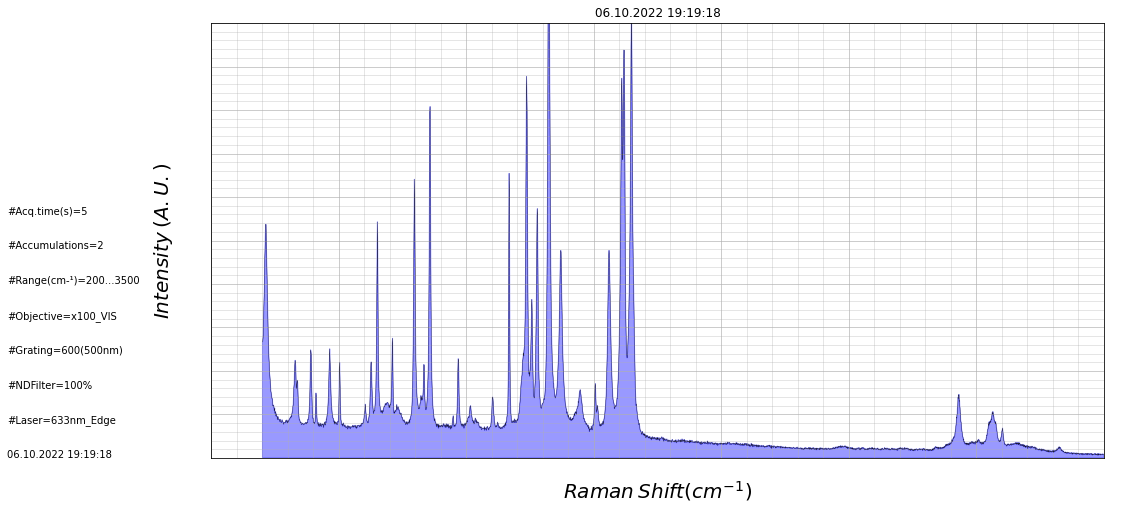

In [3]:
p.altPlot(xinit=0,xlim=3501,ylim=5001)

In [4]:
x = np.linspace(0,100,100)
z = np.linspace(1000,1100,100)

In [5]:
t = np.exp(-0.001*(x-40)**2)

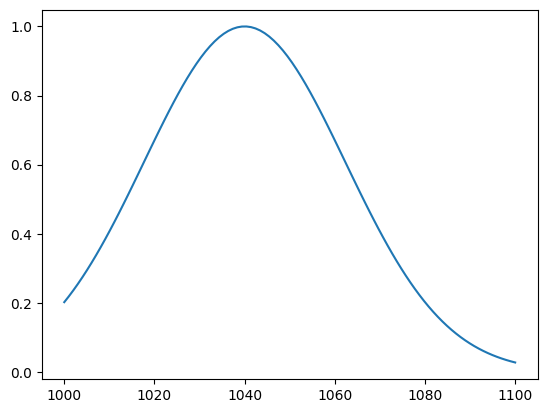

In [6]:
import matplotlib.pyplot as plt

plt.plot(z,t)

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import scaleogram as scg 
import pywt


In [38]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [39]:
pywt.wavelist(family='shan', kind='all')

['shan']

In [10]:
scg.set_default_wavelet('gaus8')

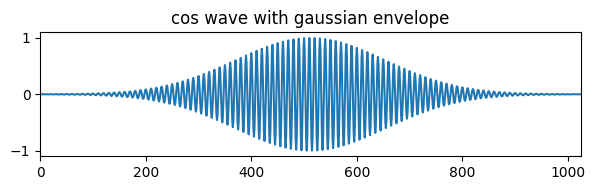

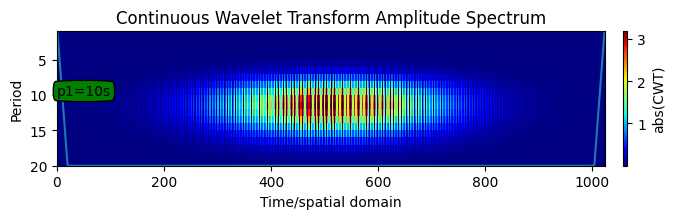

In [11]:

#File ~/.local/lib/python3.10/site-packages/matplotlib/artist.py:989, in Artist._set_alpha_for_array(self, alpha)
#    979 """
#    980 Set the alpha value used for blending - not supported on all backends.
#    981 
#   (...)
#    986     Masked values and nans are not supported.
#    987 """
#    988 if isinstance(alpha, str):
#--> 989     raise TypeError("alpha must be numeric or None, not a string")
#    990 if not np.iterable(alpha):
#    991     Artist.set_alpha(self, alpha)


# let consider a timeline with 1 sample / second
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 20) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(0, 10), bbox=dict(boxstyle="round4", fc="g"))
plt.tight_layout()

In [165]:
nx = p.spy[0:3000]

In [166]:
len(nx)

3000

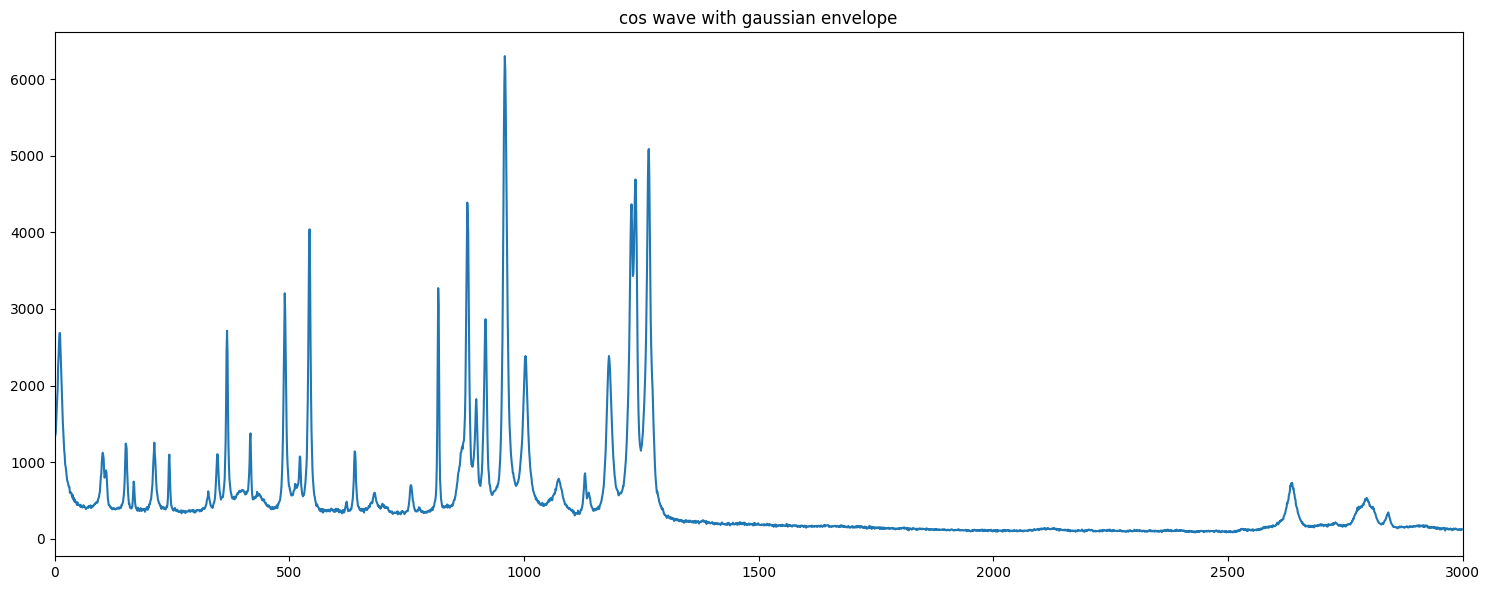

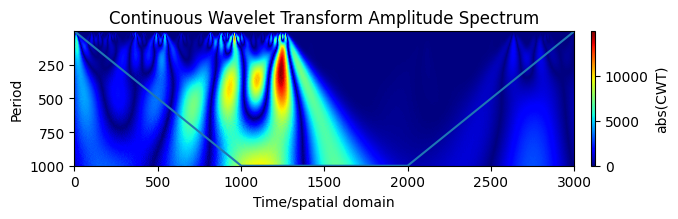

In [167]:
scg.set_default_wavelet('gaus2')

ns   = len(nx)
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 1000) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = nx #np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(15,6));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
plt.tight_layout()

In [73]:
def ranfun(k):
    r = []
    for i in range(0,k):
        r.append(np.random.random())
    return np.array(r)/2


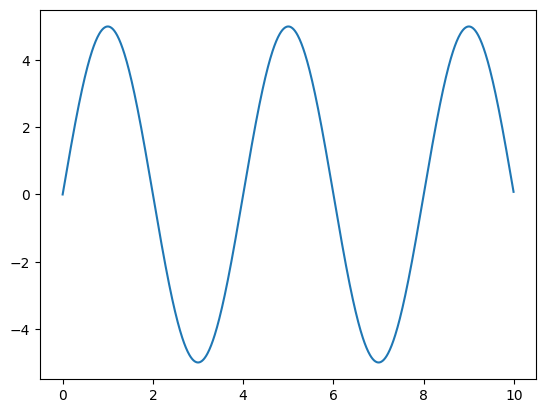

In [174]:
x  = np.arange(0,10,0.01)
y  = 0.5*np.sin((3.1416)*0.15*x)
y1 = np.sin((3.1416)*0.6*x)
y2 = 0.5*np.sin((3.1416)*5*x)
y3 = 5*np.sin((3.1416)*0.5*x)
#ss = np.sin(x*0.1)
#pp = np.sin(100*x)

noise  = ranfun(len(x))

#signal = noise+y+ss+pp
signal = y+y1+y2
signal = signal + noise
plt.plot(x, si)


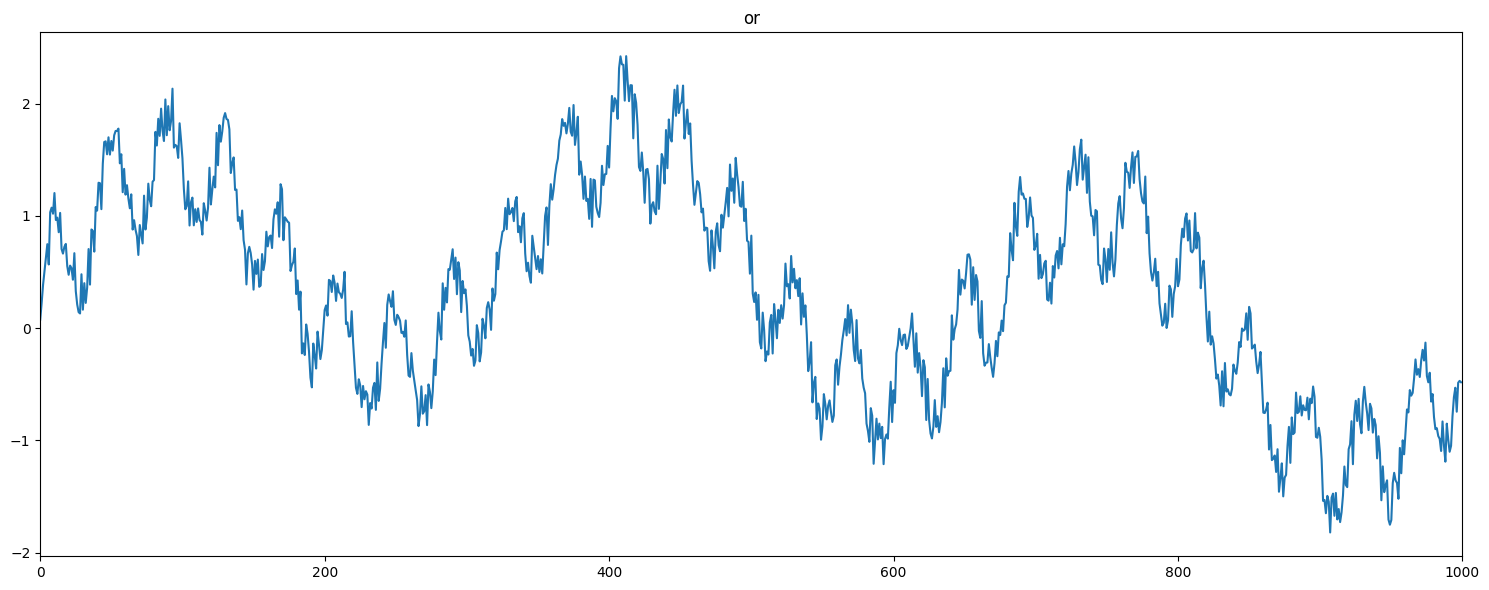

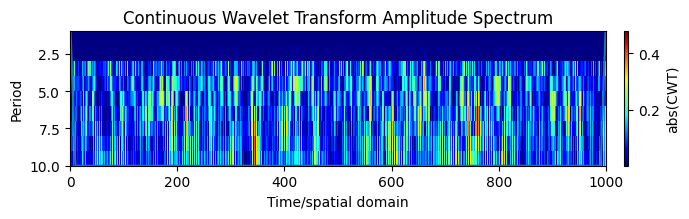

In [172]:
rango  = 10

scg.set_default_wavelet('gaus8')

times   = len(signal)
time = np.arange(times)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, rango) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = signal #np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(15,6));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("or")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
plt.tight_layout()

In [1]:
    import numpy as np
    import scaleogram as scg
    periods = np.logspace(np.log10(2), np.log10(100), 100)
    wavelet = 'cgau5'
    scales  = periods2scales(periods, wavelet)
    data    = np.random.randn(512)  # gaussian noise
    scg.cws( data, scales=scales, wavelet=wavelet, yscale='log',
            title="CWT of gaussian noise with constant binning in Y logscale")

NameError: name 'periods2scales' is not defined